In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [8]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K=len(set(y_train))
print(K)

10


In [9]:
i= Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5298 - accuracy: 0.8053 - val_loss: 0.4127 - val_accuracy: 0.8442
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3691 - accuracy: 0.8604 - val_loss: 0.3420 - val_accuracy: 0.8710
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3185 - accuracy: 0.8787 - val_loss: 0.3294 - val_accuracy: 0.8807
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2852 - accuracy: 0.8923 - val_loss: 0.3029 - val_accuracy: 0.8878
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2584 - accuracy: 0.9023 - val_loss: 0.2979 - val_accuracy: 0.8908
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2357 - accuracy: 0.9104 - val_loss: 0.2883 - val_accuracy: 0.8978
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2167 - accuracy: 0.9174 - val_loss: 0.3043 -

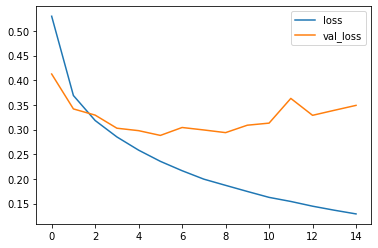

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')#validation data loss
plt.legend()

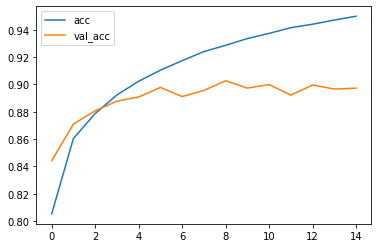

In [12]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')#validation data loss
plt.legend()

313/313 [==============================] - 2s 6ms/step
Confusion matrix, without normalization
[[868   2  27  15   3   4  73   0   8   0]
 [  4 977   0  11   3   0   4   0   1   0]
 [ 16   1 842  13  63   0  60   0   5   0]
 [ 18   4  18 909  26   0  23   0   2   0]
 [  1   2  46  25 854   0  69   0   3   0]
 [  0   0   0   1   0 972   0  14   2  11]
 [140   1  65  27  95   2 660   0  10   0]
 [  0   0   0   0   0  16   0 943   0  41]
 [  1   0   3   0   7   1   7   2 978   1]
 [  1   0   0   0   0   8   0  21   0 970]]


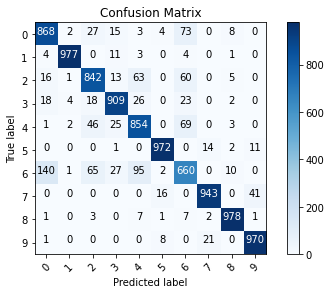

In [13]:


from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [14]:
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
'''.split()

Text(0.5, 1.0, 'True label: Shirt  Predicted label: T-shirt/top')

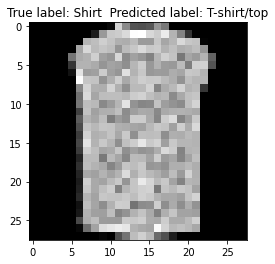

In [16]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %s  Predicted label: %s'%(labels[y_test[i]],labels[p_test[i]]))
